In [37]:
#	Karishma Sinha
#	2018339
#	CSE648: Privacy and Security in Online Social Media
#   Section-I

In [38]:
import pandas as pd

In [39]:
reddit_df = pd.read_pickle('/Users/karishma/Downloads/datasets/redditDataset.pkl')

In [40]:
reddit_df

,text,subreddit
0,that sounds like the answer of a man who does ...,humor
1,i always wonder what people get out of reposti...,humor
2,fuck that downvote them for stalking you in t...,humor
3,seeing as how much this has been around and a...,humor
4,it took me a while to even get my legally requ...,humor
...,...,...
99995,probably because it should nt be anyone else s...,news
99996,of course i do the sole responsibility of the ...,news
99997,its also just unwise if they block his pick lo...,news
99998,another holographic storage for us to hear a...,news


In [41]:
reddit_df.dtypes


text         object
subreddit    object
dtype: object

In [42]:
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from flair.models import TextClassifier
from flair.data import Sentence
import string
emotion_classifier = TextClassifier.load('en-sentiment')

2021-03-09 07:57:22,914 loading file /Users/karishma/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [43]:
def preprocess(row):
    wordtok = []
    words=str(row['text']).split()
    #print (words)
    for j in words:
        #print(j)
        wordtok += nltk.tokenize.word_tokenize(j)
    wordtok = [i.lower() for i in wordtok]
    #print(tokens)
    obj=str.maketrans('', '',string.punctuation)
    wordtok = [i.translate(obj) for i in wordtok]
    stop_words = set(nltk.corpus.stopwords.words("english"))
    wordtok = [i for i in wordtok if i not in stop_words]
    wordtok = [i for i in wordtok if len(i)>2]
    #print(wordtok)
    strwordtok = " "    
    strwordtok= strwordtok.join(wordtok)  
    #print(row['text'])
    row['text']=strwordtok
    #print(row['text'])
    return None 

In [44]:
reddit_df.sample(n=10000).apply (lambda row: preprocess(row), axis=1)

85910    None
9528     None
19842    None
71533    None
80280    None
         ... 
63563    None
44587    None
88648    None
52044    None
59775    None
Length: 10000, dtype: object

In [45]:
humor_df=reddit_df[reddit_df['subreddit']=='humor']
humor_df

,text,subreddit
0,that sounds like the answer of a man who does ...,humor
1,i always wonder what people get out of reposti...,humor
2,fuck that downvote them for stalking you in t...,humor
3,seeing as how much this has been around and a...,humor
4,it took me a while to even get my legally requ...,humor
...,...,...
49995,one of my top comments is about my gf teasing ...,humor
49996,it s not a big deal she s actually pretty luck...,humor
49997,he did you a favor the chocolate part is the b...,humor
49998,does nt always work but a lot of the time i h...,humor


In [46]:
news_df=reddit_df[reddit_df['subreddit']=='news']
news_df

,text,subreddit
50000,just a hunch people that write about this stu...,news
50001,before you all get too deep in to your selfrig...,news
50002,no one is saying he does nt have an impressive...,news
50003,there are so many things wrong with this i do ...,news
50004,hillary comes across on tv as a complete liar ...,news
...,...,...
99995,probably because it should nt be anyone else s...,news
99996,of course i do the sole responsibility of the ...,news
99997,its also just unwise if they block his pick lo...,news
99998,another holographic storage for us to hear a...,news


In [47]:
news_df.columns


Index(['text', 'subreddit'], dtype='object')

In [48]:
#news_df.iloc[1]['text']

In [49]:
def add_polarity_flair(row):
    inp0= row['text']
    input_sentence0 = Sentence(inp0)
    emotion_classifier.predict(input_sentence0)
    return input_sentence0.labels

In [50]:
humor_df1=humor_df.head(100)
news_df1=news_df.head(100)

In [51]:
#humor_df1.apply (lambda row: add_polarity_flair(row), axis=1)

In [52]:
#news_df1.apply (lambda row: add_polarity_flair(row), axis=1)

In [53]:
humor_df1['Polarity'] = humor_df1.apply (lambda row: add_polarity_flair(row), axis=1)
humor_df1

<ipython-input-53-fb93a938e754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humor_df1['Polarity'] = humor_df1.apply (lambda row: add_polarity_flair(row), axis=1)


,text,subreddit,Polarity
0,that sounds like the answer of a man who does ...,humor,[NEGATIVE (0.9989)]
1,i always wonder what people get out of reposti...,humor,[NEGATIVE (0.9998)]
2,fuck that downvote them for stalking you in t...,humor,[NEGATIVE (0.9815)]
3,seeing as how much this has been around and a...,humor,[NEGATIVE (1.0)]
4,it took me a while to even get my legally requ...,humor,[NEGATIVE (0.9994)]
...,...,...,...
95,anyone can call themselves anything whether o...,humor,[NEGATIVE (0.9999)]
96,nixon gets impeached for editing audio recordi...,humor,[NEGATIVE (0.9411)]
97,as an apartment maintenance guy the oxygen amp...,humor,[NEGATIVE (0.8834)]
98,bernie s album was a lot heavier and touches o...,humor,[NEGATIVE (0.984)]


In [54]:
news_df1['Polarity'] = news_df1.apply (lambda row: add_polarity_flair(row), axis=1)
news_df1

<ipython-input-54-7111dd82c121>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df1['Polarity'] = news_df1.apply (lambda row: add_polarity_flair(row), axis=1)


,text,subreddit,Polarity
50000,just a hunch people that write about this stu...,news,[NEGATIVE (1.0)]
50001,before you all get too deep in to your selfrig...,news,[NEGATIVE (0.994)]
50002,no one is saying he does nt have an impressive...,news,[NEGATIVE (0.9997)]
50003,there are so many things wrong with this i do ...,news,[NEGATIVE (0.9999)]
50004,hillary comes across on tv as a complete liar ...,news,[NEGATIVE (0.9993)]
...,...,...,...
50095,thanks for the comments glad you have nt been ...,news,[NEGATIVE (0.9408)]
50096,we also had elections for congress and guess w...,news,[NEGATIVE (1.0)]
50097,gt the former news manager at twitter and the...,news,[NEGATIVE (0.9953)]
50098,i think the biggest loss to that race was no b...,news,[NEGATIVE (0.8402)]


In [55]:
#pip install textblob

In [56]:
from textblob import TextBlob

In [57]:
#news_df

In [58]:
print(len(news_df))
print(len(reddit_df))
print(len(humor_df))

50000
100000
50000


In [59]:
def add_polarity(row):
    return TextBlob(row['text']).sentiment.polarity


In [60]:
def add_subjectivity(row):
    return TextBlob(row['text']).sentiment.subjectivity

In [61]:
#news_df.apply (lambda row: add_polarity(row), axis=1)

In [62]:
#news_df.apply (lambda row: add_subjectivity(row), axis=1)

In [63]:
news_df['Polarity'] = news_df.apply (lambda row: add_polarity(row), axis=1)
news_df['subjectivity'] = news_df.apply (lambda row: add_subjectivity(row), axis=1)

news_df

<ipython-input-63-73099ee6dfa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['Polarity'] = news_df.apply (lambda row: add_polarity(row), axis=1)
<ipython-input-63-73099ee6dfa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['subjectivity'] = news_df.apply (lambda row: add_subjectivity(row), axis=1)


,text,subreddit,Polarity,subjectivity
50000,just a hunch people that write about this stu...,news,0.062500,0.458333
50001,before you all get too deep in to your selfrig...,news,0.195089,0.466964
50002,no one is saying he does nt have an impressive...,news,0.253968,0.467857
50003,there are so many things wrong with this i do ...,news,0.080000,0.620000
50004,hillary comes across on tv as a complete liar ...,news,0.016667,0.409524
...,...,...,...,...
99995,probably because it should nt be anyone else s...,news,-0.183333,0.383333
99996,of course i do the sole responsibility of the ...,news,0.000000,0.250000
99997,its also just unwise if they block his pick lo...,news,-0.190000,0.680000
99998,another holographic storage for us to hear a...,news,0.200000,0.200000


In [64]:
humor_df['Polarity'] = humor_df.apply (lambda row: add_polarity(row), axis=1)
humor_df['subjectivity'] = humor_df.apply (lambda row: add_subjectivity(row), axis=1)

humor_df

<ipython-input-64-ac9228195417>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humor_df['Polarity'] = humor_df.apply (lambda row: add_polarity(row), axis=1)
<ipython-input-64-ac9228195417>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humor_df['subjectivity'] = humor_df.apply (lambda row: add_subjectivity(row), axis=1)


,text,subreddit,Polarity,subjectivity
0,that sounds like the answer of a man who does ...,humor,-0.005556,0.138889
1,i always wonder what people get out of reposti...,humor,-0.029167,0.800000
2,fuck that downvote them for stalking you in t...,humor,-0.200000,0.362500
3,seeing as how much this has been around and a...,humor,0.350000,0.350000
4,it took me a while to even get my legally requ...,humor,-0.029167,0.304167
...,...,...,...,...
49995,one of my top comments is about my gf teasing ...,humor,0.282500,0.540000
49996,it s not a big deal she s actually pretty luck...,humor,0.185556,0.544444
49997,he did you a favor the chocolate part is the b...,humor,0.500000,0.150000
49998,does nt always work but a lot of the time i h...,humor,0.633333,0.579167


In [65]:
def club_polarity(row):
    if row['Polarity']>0.0:
        return "Positive"
    elif row['Polarity']==0.0:
        return "Neutral"
    elif row['Polarity']<0.0:
        return "Negative"


In [66]:
def club_subjectivity(row):
    if row['subjectivity']>=0.5:
        return "Subjective"
    elif row['subjectivity']<0.5:
        return "Objective"

In [67]:
humor_df.apply (lambda row: club_polarity(row), axis=1)

0        Negative
1        Negative
2        Negative
3        Positive
4        Negative
           ...   
49995    Positive
49996    Positive
49997    Positive
49998    Positive
49999    Positive
Length: 50000, dtype: object

In [68]:
humor_df['Subj/Obj']=humor_df.apply (lambda row: club_subjectivity(row), axis=1)

<ipython-input-68-b14148952b92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humor_df['Subj/Obj']=humor_df.apply (lambda row: club_subjectivity(row), axis=1)


In [69]:
news_df['Subj/Obj']=news_df.apply (lambda row: club_subjectivity(row), axis=1)

<ipython-input-69-3f14a8184370>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['Subj/Obj']=news_df.apply (lambda row: club_subjectivity(row), axis=1)


In [70]:
humor_df['TypeOfPolarity'] = humor_df.apply (lambda row: club_polarity(row), axis=1)

<ipython-input-70-6997cb26ab12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humor_df['TypeOfPolarity'] = humor_df.apply (lambda row: club_polarity(row), axis=1)


In [71]:
news_df['TypeOfPolarity'] = news_df.apply (lambda row: club_polarity(row), axis=1)

<ipython-input-71-2f48f1257654>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['TypeOfPolarity'] = news_df.apply (lambda row: club_polarity(row), axis=1)


In [72]:
humor_df

,text,subreddit,Polarity,subjectivity,Subj/Obj,TypeOfPolarity
0,that sounds like the answer of a man who does ...,humor,-0.005556,0.138889,Objective,Negative
1,i always wonder what people get out of reposti...,humor,-0.029167,0.800000,Subjective,Negative
2,fuck that downvote them for stalking you in t...,humor,-0.200000,0.362500,Objective,Negative
3,seeing as how much this has been around and a...,humor,0.350000,0.350000,Objective,Positive
4,it took me a while to even get my legally requ...,humor,-0.029167,0.304167,Objective,Negative
...,...,...,...,...,...,...
49995,one of my top comments is about my gf teasing ...,humor,0.282500,0.540000,Subjective,Positive
49996,it s not a big deal she s actually pretty luck...,humor,0.185556,0.544444,Subjective,Positive
49997,he did you a favor the chocolate part is the b...,humor,0.500000,0.150000,Objective,Positive
49998,does nt always work but a lot of the time i h...,humor,0.633333,0.579167,Subjective,Positive


In [73]:
news_df

,text,subreddit,Polarity,subjectivity,Subj/Obj,TypeOfPolarity
50000,just a hunch people that write about this stu...,news,0.062500,0.458333,Objective,Positive
50001,before you all get too deep in to your selfrig...,news,0.195089,0.466964,Objective,Positive
50002,no one is saying he does nt have an impressive...,news,0.253968,0.467857,Objective,Positive
50003,there are so many things wrong with this i do ...,news,0.080000,0.620000,Subjective,Positive
50004,hillary comes across on tv as a complete liar ...,news,0.016667,0.409524,Objective,Positive
...,...,...,...,...,...,...
99995,probably because it should nt be anyone else s...,news,-0.183333,0.383333,Objective,Negative
99996,of course i do the sole responsibility of the ...,news,0.000000,0.250000,Objective,Neutral
99997,its also just unwise if they block his pick lo...,news,-0.190000,0.680000,Subjective,Negative
99998,another holographic storage for us to hear a...,news,0.200000,0.200000,Objective,Positive


In [74]:
humor_PCount=humor_df.value_counts("Polarity").reset_index(name='NumberOfComments')
print(humor_PCount)

     Polarity  NumberOfComments
0    0.000000              6137
1    0.250000              1246
2    0.500000               980
3    0.200000               883
4    0.300000               762
..        ...               ...
705 -0.109722                 9
706 -0.275000                 9
707 -0.017708                 7
708 -0.158475                 7
709 -0.258333                 1

[710 rows x 2 columns]


In [75]:
news_PCount=news_df.value_counts("Polarity").reset_index(name='NumberOfComments')
print(news_PCount)

     Polarity  NumberOfComments
0    0.000000              5703
1    0.500000              1071
2    0.250000              1016
3    0.200000               955
4    0.100000               678
..        ...               ...
986  0.086667                 3
987  0.014286                 3
988  0.208889                 2
989  0.004167                 2
990 -0.030000                 1

[991 rows x 2 columns]


In [76]:
humor_SCount=humor_df.value_counts("subjectivity").reset_index(name='NumberOfComments')
print(humor_SCount)

     subjectivity  NumberOfComments
0        0.000000              4014
1        0.500000              1963
2        1.000000              1043
3        0.600000               996
4        0.400000               927
..            ...               ...
654      0.363889                 9
655      0.339286                 8
656      0.586458                 7
657      0.342235                 7
658      0.151515                 4

[659 rows x 2 columns]


In [77]:
news_SCount=news_df.value_counts("subjectivity").reset_index(name='NumberOfComments')
print(news_SCount)

     subjectivity  NumberOfComments
0        0.000000              3257
1        0.500000              2237
2        1.000000              1126
3        0.400000               937
4        0.600000               825
..            ...               ...
904      0.493750                 4
905      0.317857                 4
906      0.343452                 3
907      0.385000                 3
908      0.537778                 2

[909 rows x 2 columns]


In [78]:
humor_PTypeCount=humor_df.value_counts("TypeOfPolarity").reset_index(name='NumberOfComments')
print(humor_PTypeCount)

  TypeOfPolarity  NumberOfComments
0       Positive             26562
1       Negative             17301
2        Neutral              6137


In [79]:
news_PTypeCount=news_df.value_counts("TypeOfPolarity").reset_index(name='NumberOfComments')
print(news_PTypeCount)

  TypeOfPolarity  NumberOfComments
0       Positive             28770
1       Negative             15527
2        Neutral              5703


In [80]:
humor_STypeCount=humor_df.value_counts("Subj/Obj").reset_index(name='NumberOfComments')
print(humor_STypeCount)

     Subj/Obj  NumberOfComments
0  Subjective             25233
1   Objective             24767


In [81]:
news_STypeCount=news_df.value_counts("Subj/Obj").reset_index(name='NumberOfComments')
print(news_STypeCount)

     Subj/Obj  NumberOfComments
0   Objective             25854
1  Subjective             24146


In [82]:
humor_PCount.dtypes

Polarity            float64
NumberOfComments      int64
dtype: object

In [83]:
humor_PCount


,Polarity,NumberOfComments
0,0.000000,6137
1,0.250000,1246
2,0.500000,980
3,0.200000,883
4,0.300000,762
...,...,...
705,-0.109722,9
706,-0.275000,9
707,-0.017708,7
708,-0.158475,7


Text(0, 0.5, 'Number Of Comments')

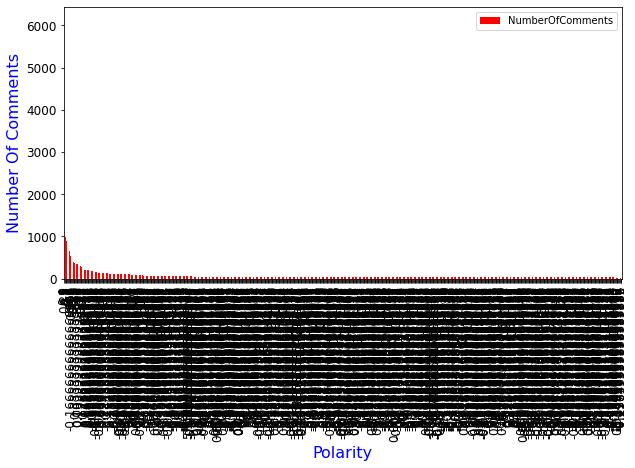

In [84]:
PplotH1=humor_PCount.plot(x="Polarity", y="NumberOfComments", color='red', kind="bar", xlabel="Polarity",ylabel="Number of Comments",figsize=(10,5),fontsize=12)
#PplotH.set(xticklabels=[])
PplotH1.yaxis.label.set_color('blue')
PplotH1.xaxis.label.set_color('blue')
PplotH1.set_xlabel("Polarity", size=16)
PplotH1.set_ylabel("Number Of Comments",size=16)
#PplotH1.show()

Text(0, 0.5, 'Number Of Comments')

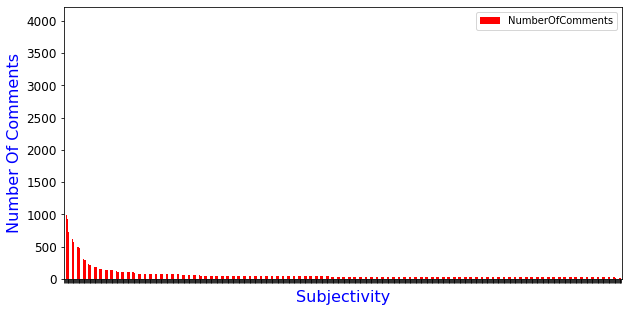

In [85]:
PplotS1=humor_SCount.plot(x="subjectivity", y="NumberOfComments", color='red', kind="bar", xlabel="Subjectivity",ylabel="Number of Comments",figsize=(10,5),fontsize=12)
PplotS1.set(xticklabels=[])
PplotS1.yaxis.label.set_color('blue')
PplotS1.xaxis.label.set_color('blue')
PplotS1.set_xlabel("Subjectivity", size=16)
PplotS1.set_ylabel("Number Of Comments",size=16)
#PplotH1.show()

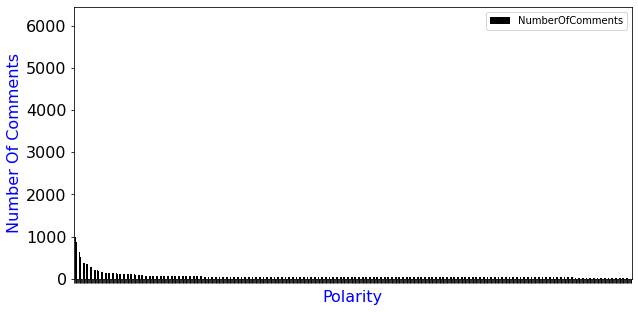

In [86]:
PplotH2=humor_PCount.plot(x="Polarity", y="NumberOfComments", color='black', kind="bar", xlabel="Polarity",ylabel="Number of Comments",figsize=(10,5),fontsize=16)
PplotH2.set(xticklabels=[])
PplotH2.yaxis.label.set_color('blue')
PplotH2.xaxis.label.set_color('blue')

PplotH2.set_xlabel("Polarity", size=16)
PplotH2.set_ylabel("Number Of Comments",size=16)

meanPolarity_Humor= humor_df["Polarity"].mean()
stdPolarity_Humor=humor_df["Polarity"].std()
#PplotH2.axhline(meanPolarity_Humor, color ="red", linestyle ="--") 
#PplotH2.axhline(stdPolarity_Humor, color ="blue", linestyle =":")

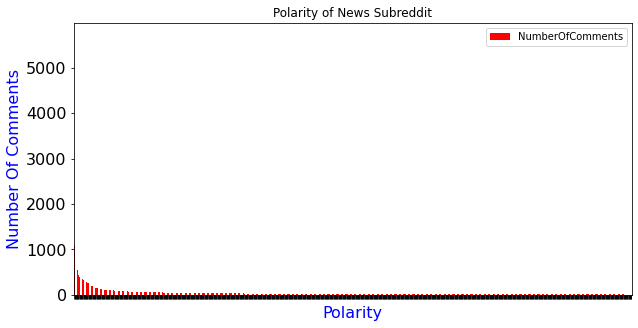

In [87]:
PplotN2=news_PCount.plot(x="Polarity", y="NumberOfComments", color='red', kind="bar", xlabel="Polarity",ylabel="Number of Comments",figsize=(10,5),fontsize=16, title='Polarity of News Subreddit')
PplotN2.set(xticklabels=[])
PplotN2.yaxis.label.set_color('blue')
PplotN2.xaxis.label.set_color('blue')

PplotN2.set_xlabel("Polarity", size=16)
PplotN2.set_ylabel("Number Of Comments",size=16)

meanPolarity_News= news_df["Polarity"].mean()
stdPolarity_News=news_df["Polarity"].std()
#PplotH2.axhline(meanPolarity_Humor, color ="red", linestyle ="--") 
#PplotH2.axhline(stdPolarity_Humor, color ="blue", linestyle =":")

Text(0, 0.5, 'Number Of Comments')

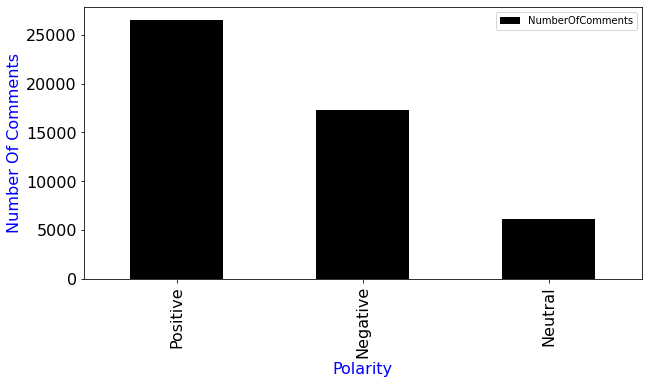

In [88]:
PTypeplotH=humor_PTypeCount.plot(x="TypeOfPolarity", y="NumberOfComments", color='black', kind="bar", xlabel="Polarity",ylabel="Number of Comments",figsize=(10,5),fontsize=16)
#PplotH.set(xticklabels=[])
PTypeplotH.yaxis.label.set_color('blue')
PTypeplotH.xaxis.label.set_color('blue')

PTypeplotH.set_xlabel("Polarity", size=16)
PTypeplotH.set_ylabel("Number Of Comments",size=16)

# PTypeplotH.axhline(meanPolarity_Humor, color ="red", linestyle ="--") 
# PTypeplotH.axhline(stdPolarity_Humor, color ="blue", linestyle =":")

In [89]:
from matplotlib.patches import Patch
colour_list = {"Positive": 'g',"Neutral":'yellow',"Negative":"red"}

Text(0, 0.5, 'Number Of Comments')

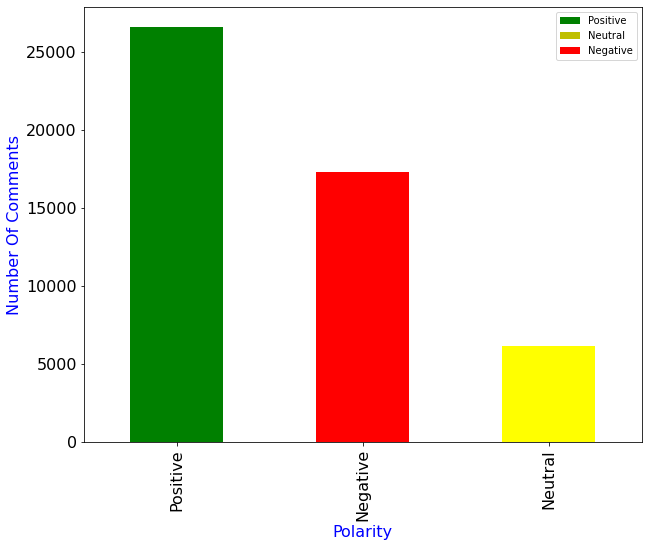

In [90]:
PTypePlotH2=humor_PTypeCount.plot(x="TypeOfPolarity", y="NumberOfComments", color=humor_PTypeCount["TypeOfPolarity"].replace(colour_list), kind="bar", xlabel="Polarity",ylabel="Number of Comments",fontsize=16,figsize=(10,8))
PTypePlotH2.legend(
    [
        Patch(facecolor='g'),
        Patch(facecolor='y'),
        Patch(facecolor='r')
    ], ["Positive", "Neutral","Negative"]
)

PTypePlotH2.yaxis.label.set_color('blue')
PTypePlotH2.xaxis.label.set_color('blue')

PTypePlotH2.set_xlabel("Polarity", size=16)
PTypePlotH2.set_ylabel("Number Of Comments",size=16)

Text(0, 0.5, 'Number Of Comments')

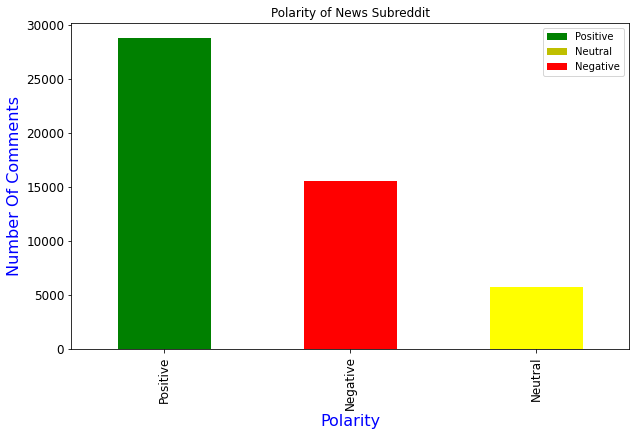

In [91]:
PTypePlotN2=news_PTypeCount.plot(x="TypeOfPolarity", y="NumberOfComments", color=news_PTypeCount["TypeOfPolarity"].replace(colour_list), kind="bar", xlabel="Polarity",ylabel="Number of Comments",fontsize=12,figsize=(10,6),title='Polarity of News Subreddit')
PTypePlotN2.legend(
    [
        Patch(facecolor='g'),
        Patch(facecolor='y'),
        Patch(facecolor='r')
    ], ["Positive", "Neutral","Negative"]
)

PTypePlotN2.yaxis.label.set_color('blue')
PTypePlotN2.xaxis.label.set_color('blue')

PTypePlotN2.set_xlabel("Polarity", size=16)
PTypePlotN2.set_ylabel("Number Of Comments",size=16)

In [92]:
#from matplotlib.patches import Patch
colour_listS = {"Subjective": 'cornflowerblue',"Objective":'palevioletred'}

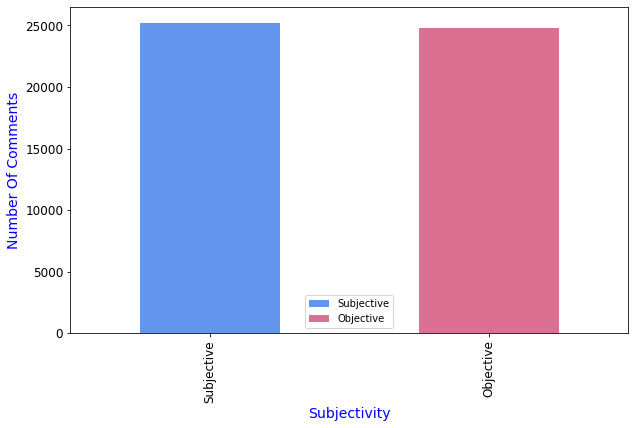

In [93]:
STypePlotH2=humor_STypeCount.plot(x="Subj/Obj", y="NumberOfComments", color=humor_STypeCount["Subj/Obj"].replace(colour_listS), kind="bar", xlabel="Subjectivity",ylabel="Number of Comments",fontsize=12,figsize=(10,6))
STypePlotH2.legend(
    [
        Patch(facecolor='cornflowerblue'),
        Patch(facecolor='palevioletred')
    ], ["Subjective", "Objective"]
)

STypePlotH2.yaxis.label.set_color('blue')
STypePlotH2.xaxis.label.set_color('blue')

STypePlotH2.set_xlabel("Subjectivity", size=14)
STypePlotH2.set_ylabel("Number Of Comments",size=14)

meanSubjectivity_Humor= humor_df["subjectivity"].mean()
stdSubjectivity_Humor=humor_df["subjectivity"].std()

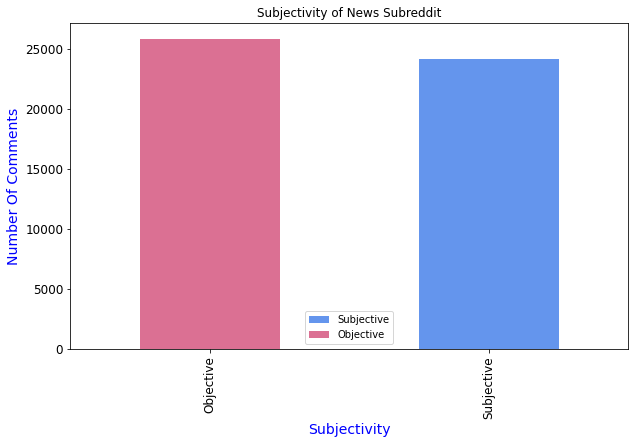

In [94]:
STypePlotN2=news_STypeCount.plot(x="Subj/Obj", y="NumberOfComments", color=news_STypeCount["Subj/Obj"].replace(colour_listS), kind="bar", xlabel="Subjectivity",ylabel="Number of Comments",fontsize=12,figsize=(10,6),title='Subjectivity of News Subreddit')
STypePlotN2.legend(
    [
        Patch(facecolor='cornflowerblue'),
        Patch(facecolor='palevioletred')
    ], ["Subjective", "Objective"]
)

STypePlotN2.yaxis.label.set_color('blue')
STypePlotN2.xaxis.label.set_color('blue')

STypePlotN2.set_xlabel("Subjectivity", size=14)
STypePlotN2.set_ylabel("Number Of Comments",size=14)

meanSubjectivity_News= news_df["subjectivity"].mean()
stdSubjectivity_News=news_df["subjectivity"].std()

In [95]:
dataH = {'Mean':[meanPolarity_Humor,meanSubjectivity_Humor], 
        'StandardDeviation':[stdPolarity_Humor,stdSubjectivity_Humor]} 
dataHplot2 = pd.DataFrame(dataH, index =['Polarity', 
                                'Subjectivity']) 
dataHplot2

,Mean,StandardDeviation
Polarity,0.052316,0.247794
Subjectivity,0.470718,0.242443


In [96]:
dataN = {'Mean':[meanPolarity_News,meanSubjectivity_News], 
        'StandardDeviation':[stdPolarity_News,stdSubjectivity_News]} 
dataNplot2 = pd.DataFrame(dataN, index =['Polarity', 
                                'Subjectivity']) 
dataNplot2

,Mean,StandardDeviation
Polarity,0.063913,0.230325
Subjectivity,0.469159,0.231927


<AxesSubplot:title={'center':'Humor Subreddit Polarity and Subjectivity'}, ylabel='Number of Comments'>

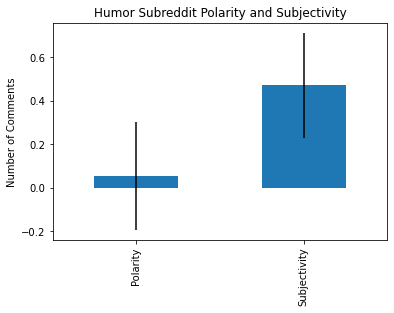

In [97]:
dataHplot2.plot(kind = "bar", y = "Mean", legend = False, 
            title = "Humor Subreddit Polarity and Subjectivity", yerr = "StandardDeviation", ylabel='Number of Comments')

<AxesSubplot:title={'center':'News Subreddit Polarity and Subjectivity'}, ylabel='Number of Comments'>

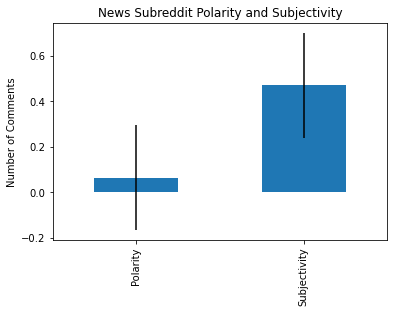

In [98]:
dataNplot2.plot(kind = "bar", y = "Mean", legend = False, 
            title = "News Subreddit Polarity and Subjectivity", yerr = "StandardDeviation", ylabel='Number of Comments')

In [99]:
import nltk
#import json
#import glob
from pprint import pprint
from collections import Counter
import string
from nltk.util import ngrams


In [100]:
humor_ngram=humor_df
news_ngram=news_df

In [101]:
humor_ngram.columns

Index(['text', 'subreddit', 'Polarity', 'subjectivity', 'Subj/Obj',
       'TypeOfPolarity'],
      dtype='object')

In [102]:
humor_content = [i for i in humor_ngram["text"]]
#humor_content

In [135]:
news_content = [i for i in news_ngram["text"]]
#humor_content

In [103]:
wordtok = []
#wordcountperpost=[]
for i in humor_content:
    #print (len(i))
    words=str(i).split()
    #print(words)
    #break
    #wordcount=0;
    for j in words:
        #print(len(j))
#         if j[0].isalpha():
#             #print(j)
#             wordcount+=1
        wordtok += nltk.tokenize.word_tokenize(j)
    #wordcountperpost.append(wordcount)

In [104]:
wordtok = [i.lower() for i in wordtok]
#print(tokens)
obj=str.maketrans('', '',string.punctuation)
wordtok = [i.translate(obj) for i in wordtok]
stop_words = set(nltk.corpus.stopwords.words("english"))
wordtok = [i for i in wordtok if i not in stop_words]
wordtok = [i for i in wordtok if len(i)>2]
c1 = Counter(wordtok)
c1.most_common(10)

[('like', 9043),
 ('one', 7262),
 ('people', 6853),
 ('would', 6808),
 ('get', 5897),
 ('time', 4899),
 ('know', 4310),
 ('guy', 3513),
 ('really', 3427),
 ('got', 3239)]

In [136]:
wordtoknews = []
#wordcountperpost=[]
for i in news_content:
    #print (len(i))
    wordsnews=str(i).split()
    #print(words)
    #break
    #wordcount=0;
    for j in wordsnews:
        #print(len(j))
#         if j[0].isalpha():
#             #print(j)
#             wordcount+=1
        wordtoknews += nltk.tokenize.word_tokenize(j)
    #wordcountperpost.append(wordcount)

In [160]:
wordtoknews = [i.lower() for i in wordtoknews]
#print(tokens)
objnews=str.maketrans('', '',string.punctuation)
wordtoknews = [i.translate(objnews) for i in wordtoknews]
stop_words = nltk.corpus.stopwords.words("english")
stop_words.append('https')
stop_words.append('wwwyoutubecomwatch')
wordtoknews = [i for i in wordtoknews if i not in stop_words]
wordtoknews = [i for i in wordtoknews if len(i)>2]
c1n = Counter(wordtoknews)
c1n.most_common(10)

[('people', 9655),
 ('would', 7918),
 ('like', 7900),
 ('get', 5541),
 ('one', 5526),
 ('think', 4071),
 ('even', 3826),
 ('really', 3538),
 ('know', 3523),
 ('time', 3418)]

In [105]:
data=[]
for i in range(0,10):
    data.append(list(c1.most_common(10)[i]))

In [161]:
datanews=[]
for i in range(0,10):
    datanews.append(list(c1n.most_common(10)[i]))

In [106]:
data

[['like', 9043],
 ['one', 7262],
 ['people', 6853],
 ['would', 6808],
 ['get', 5897],
 ['time', 4899],
 ['know', 4310],
 ['guy', 3513],
 ['really', 3427],
 ['got', 3239]]

In [162]:
datanews

[['people', 9655],
 ['would', 7918],
 ['like', 7900],
 ['get', 5541],
 ['one', 5526],
 ['think', 4071],
 ['even', 3826],
 ['really', 3538],
 ['know', 3523],
 ['time', 3418]]

In [107]:
Humor_unigram = pd.DataFrame(data, columns = ['Unigram', 'Occurrence']) 

In [163]:
News_unigram = pd.DataFrame(datanews, columns = ['Unigram', 'Occurrence']) 

Text(0, 0.5, 'Number Of Occurences')

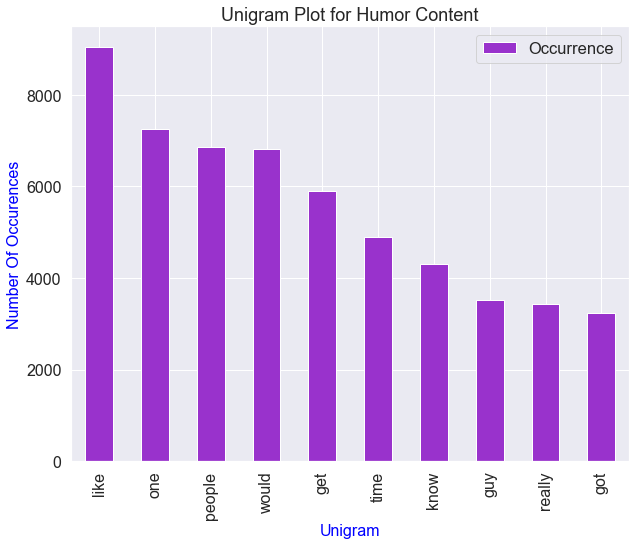

In [133]:
fplot=Humor_unigram.plot(x="Unigram", y="Occurrence", color='darkorchid', kind="bar", xlabel="Word",ylabel="Number of Occurrences",figsize=(10,8),fontsize=16, title='Unigram Plot for Humor Content')
fplot.yaxis.label.set_color('blue')
fplot.xaxis.label.set_color('blue')

fplot.set_xlabel("Unigram", size=16)
fplot.set_ylabel("Number Of Occurences",size=16)

Text(0, 0.5, 'Number Of Occurences')

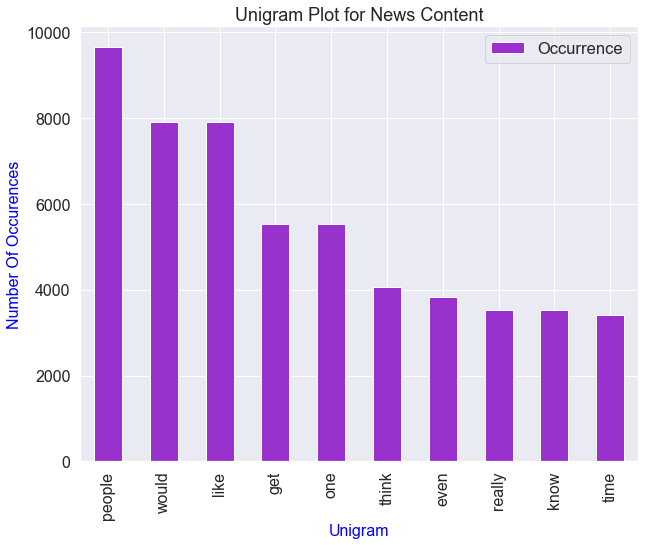

In [164]:
fplot2=News_unigram.plot(x="Unigram", y="Occurrence", color='darkorchid', kind="bar", xlabel="Word",ylabel="Number of Occurrences",figsize=(10,8),fontsize=16, title='Unigram Plot for News Content')
fplot2.yaxis.label.set_color('blue')
fplot2.xaxis.label.set_color('blue')

fplot2.set_xlabel("Unigram", size=16)
fplot2.set_ylabel("Number Of Occurences",size=16)

In [109]:
#wordtok

In [110]:
dataBi=pd.Series(ngrams(wordtok, 2))
dataBi

0             (sounds, like)
1             (like, answer)
2              (answer, man)
3             (man, custody)
4           (custody, child)
                 ...        
848175      (bold, strategy)
848176    (strategy, cotton)
848177         (cotton, let)
848178            (let, see)
848179           (see, pays)
Length: 848180, dtype: object

In [165]:
dataBi_News=pd.Series(ngrams(wordtoknews, 2))
dataBi_News

0                     (hunch, people)
1                     (people, write)
2                      (write, stuff)
3                       (stuff, take)
4                     (take, forever)
                     ...             
957392    (interests, representation)
957393      (representation, peoples)
957394           (peoples, interests)
957395            (interests, edited)
957396              (edited, clarity)
Length: 957397, dtype: object

In [111]:
df_textdataBi = pd.DataFrame(dataBi, columns = ['Bigram']) 
df_textdataBi

,Bigram
0,"(sounds, like)"
1,"(like, answer)"
2,"(answer, man)"
3,"(man, custody)"
4,"(custody, child)"
...,...
848175,"(bold, strategy)"
848176,"(strategy, cotton)"
848177,"(cotton, let)"
848178,"(let, see)"


In [166]:
df_textdataBi_News = pd.DataFrame(dataBi_News, columns = ['Bigram']) 
df_textdataBi_News

,Bigram
0,"(hunch, people)"
1,"(people, write)"
2,"(write, stuff)"
3,"(stuff, take)"
4,"(take, forever)"
...,...
957392,"(interests, representation)"
957393,"(representation, peoples)"
957394,"(peoples, interests)"
957395,"(interests, edited)"


In [112]:
Humor_Bigram=df_textdataBi.value_counts("Bigram").reset_index(name='Count')
print(Humor_Bigram)

                   Bigram  Count
0              (ayy, ayy)    899
1           (every, time)    626
2            (years, ago)    433
3            (feel, like)    422
4           (looks, like)    415
...                   ...    ...
65731  (upvote, recently)      1
65732     (instead, know)      1
65733    (upvote, render)      1
65734     (instead, kind)      1
65735      (sucks, truly)      1

[65736 rows x 2 columns]


In [167]:
News_Bigram=df_textdataBi_News.value_counts("Bigram").reset_index(name='Count')
print(News_Bigram)

                        Bigram  Count
0            (bernie, sanders)    558
1      (submission, statement)    491
2             (supreme, court)    474
3                (seems, like)    441
4                  (ron, paul)    358
...                        ...    ...
82315  (limited, legitimately)      1
82316         (limited, funny)      1
82317           (limited, fun)      1
82318       (limited, freedom)      1
82319            (want, every)      1

[82320 rows x 2 columns]


In [113]:
Humor_Bigram_plot=Humor_Bigram.head(10)
Humor_Bigram_plot

,Bigram,Count
0,"(ayy, ayy)",899
1,"(every, time)",626
2,"(years, ago)",433
3,"(feel, like)",422
4,"(looks, like)",415
5,"(year, old)",410
6,"(pretty, sure)",373
7,"(one, time)",305
8,"(valentine, day)",301
9,"(last, year)",277


In [168]:
News_Bigram_plot=News_Bigram.head(11)

#News_Bigram_plot.columns
#News_Bigram_plot.drop(News_Bigram_plot.index[4])
News_Bigram_plot

,Bigram,Count
0,"(bernie, sanders)",558
1,"(submission, statement)",491
2,"(supreme, court)",474
3,"(seems, like)",441
4,"(ron, paul)",358
5,"(health, care)",345
6,"(saudi, arabia)",337
7,"(something, like)",332
8,"(years, ago)",321
9,"(hillary, clinton)",314


Text(0, 0.5, 'Number Of Occurences')

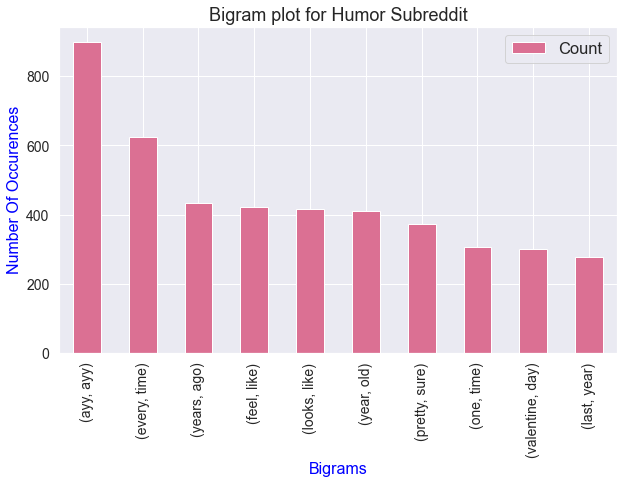

In [134]:
fplotBi=Humor_Bigram_plot.plot(x="Bigram", y="Count", color='palevioletred', kind="bar", xlabel="Bigram",ylabel="Number of Occurrences",figsize=(10,6),fontsize=14, title='Bigram plot for Humor Subreddit')
fplotBi.yaxis.label.set_color('blue')
fplotBi.xaxis.label.set_color('blue')

fplotBi.set_xlabel("Bigrams", size=16)
fplotBi.set_ylabel("Number Of Occurences",size=16)

Text(0, 0.5, 'Number Of Occurences')

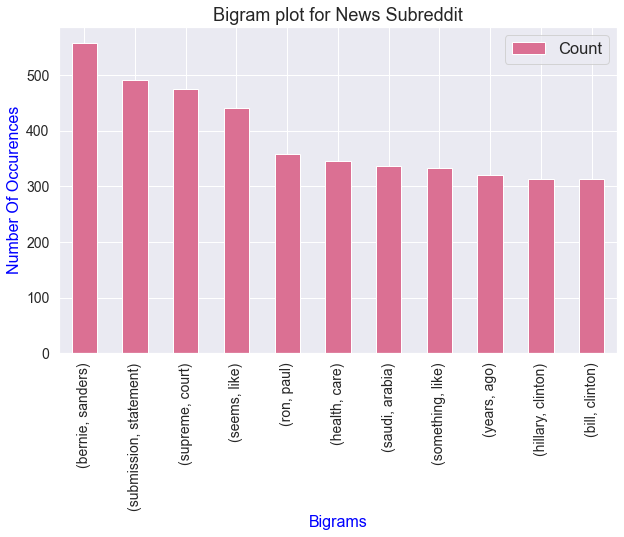

In [169]:
fplotBi2=News_Bigram_plot.plot(x="Bigram", y="Count", color='palevioletred', kind="bar", xlabel="Bigram",ylabel="Number of Occurrences",figsize=(10,6),fontsize=14, title='Bigram plot for News Subreddit')
fplotBi2.yaxis.label.set_color('blue')
fplotBi2.xaxis.label.set_color('blue')

fplotBi2.set_xlabel("Bigrams", size=16)
fplotBi2.set_ylabel("Number Of Occurences",size=16)

In [173]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB
import pickle

In [177]:
DesktopPath = "/Users/karishma/Desktop/pickle folder"


In [116]:
#wordtok count
df=reddit_df
df.dtypes

text         object
subreddit    object
dtype: object

In [206]:
BoW_comments = CountVectorizer(max_features=1000)
x = BoW_comments.fit_transform(df['text']).toarray()
voc=BoW_comments.vocabulary_

In [118]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [119]:
#x[28]

In [120]:
y = df['subreddit']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [121]:
y

0        humor
1        humor
2        humor
3        humor
4        humor
         ...  
99995     news
99996     news
99997     news
99998     news
99999     news
Name: subreddit, Length: 100000, dtype: object

In [122]:
NaiveBayesClassifier = GaussianNB()
# sc_x = StandardScaler() 
# x_train = sc_x.fit_transform(x_train)  
# x_test = sc_x.transform(x_test)
NaiveBayesClassifier.fit(x_train, y_train)

GaussianNB()

In [201]:
y_pred = NaiveBayesClassifier.predict(x_test)
y_pred


array(['humor', 'humor', 'humor', ..., 'humor', 'news', 'humor'],
      dtype='<U5')

In [202]:
x_test.shape

(30000, 1000)

In [234]:
df_trial=df.sample(n=30)
trial_comments = CountVectorizer(vocabulary=voc)
x_trial = trial_comments.fit_transform(df_trial['text']).toarray()
x_trial

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [235]:
x_trial.shape

(30, 1000)

In [236]:
y_pred_trial=NaiveBayesClassifier.predict(x_trial)
y_pred_trial

array(['humor', 'humor', 'humor', 'humor', 'humor', 'news', 'humor',
       'news', 'humor', 'humor', 'humor', 'humor', 'humor', 'humor',
       'humor', 'humor', 'humor', 'humor', 'humor', 'humor', 'news',
       'humor', 'news', 'humor', 'humor', 'humor', 'humor', 'humor',
       'humor', 'news'], dtype='<U5')

In [237]:
df_trial['Predicted_Subreddit']=y_pred_trial
df_trial

,text,subreddit,Predicted_Subreddit
48617,i do nt think impersonating her husband would ...,humor,humor
40616,my husband was going to take me out to breakfa...,humor,humor
11188,he s probably just mad because he ca nt ever e...,humor,humor
86763,we should pass on this idea time for that part...,news,humor
40806,i just moved into my first home in the first w...,humor,humor
59413,is something going on with all the major curre...,news,news
57341,you could probably just sticky this post have...,news,humor
70171,man i do nt know how many of yall get stuck l...,news,news
26199,also if you lose your dog in a familiar area d...,humor,humor
25807,it s okay if an elephant does it but as soon ...,humor,humor


In [238]:
df_trial.iloc[3]['text']

'we should pass on this idea time for that part of the world to solve their own issues without more american blood spilled '

In [124]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test,y_pred)
CM

array([[13924,  1131],
       [ 4949,  9996]])

In [125]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7973333333333333

In [126]:
accuracy_percentage = 100 * accuracy
accuracy_percentage

79.73333333333333

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       humor       0.74      0.92      0.82     15055
        news       0.90      0.67      0.77     14945

    accuracy                           0.80     30000
   macro avg       0.82      0.80      0.79     30000
weighted avg       0.82      0.80      0.79     30000



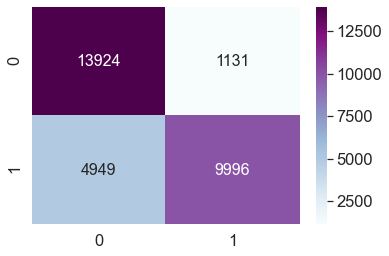

In [128]:
import seaborn as sn
import matplotlib.pyplot as plt
confusion_plot = pd.DataFrame(CM, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.5)
sn.heatmap(confusion_plot, cmap='BuPu',annot=True, annot_kws={"size": 16},fmt='g') 

plt.show()

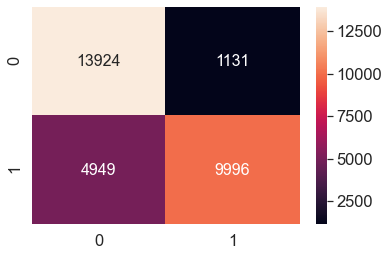

In [129]:
import seaborn as sn
import matplotlib.pyplot as plt
confusion_plot = pd.DataFrame(CM, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.5)
sn.heatmap(confusion_plot,annot=True, annot_kws={"size": 16},fmt='g') 

plt.show()

In [178]:
def BoW_modelfn(data_model,vectorizer_model):
    X = vectorizer_model.fit_transform(data_model['text']).toarray()
    Y = data_model['subreddit']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)
    NaiveBayesClassifier = GaussianNB()
    NaiveBayesClassifier.fit(X_train, Y_train)
    
    return NaiveBayesClassifier,X

In [180]:
BoW_model_location = DesktopPath + "/BoW_model.pickle"
Vectorizer_path = DesktopPath + "/vectorizer.pickle"
BoW_model, BoW_vectorizer = BoW_modelfn(df, BoW_comments)
pickle.dump(BoW_model, open(BoW_model_location, 'wb'))
pickle.dump(BoW_vectorizer, open(Vectorizer_path, "wb"))

In [130]:
# vocab = []
# #wordcountperpost=[]
# for i in x_train:
#     #print (len(i))
#     word=str(i).split()
#     #print(words)
#     #break
#     #wordcount=0;
#     for j in words:
#         #print(len(j))
# #         if j[0].isalpha():
# #             #print(j)
# #             wordcount+=1
#         vocab += nltk.tokenize.word_tokenize(j)
#     #wordcountperpost.append(wordcount)

In [131]:
# vocab = [i.lower() for i in vocab]
# #print(tokens)
# obj=str.maketrans('', '',string.punctuation)
# vocab = [i.translate(obj) for i in vocab]
# stop_words = set(nltk.corpus.stopwords.words("english"))
# vocab = [i for i in vocab if i not in stop_words]
# vocab = [i for i in vocab if len(i)>2]
# cVocab = Counter(vocab)
# cVocab.most_common(10)

In [132]:
# BoW_Vocab=[]
# for i in range(0,1000):
#     BoW_Vocab.append(list(cVocab.most_common(200)[i]))